In [39]:
import pandas as pd
import requests
from io import StringIO

%matplotlib inline

import numpy as np
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

#from pathos.multiprocessing import ProcessingPool as Pool
import pandas.util.testing as tm
import multiprocessing as mp

In [40]:
both_drive = 'https://drive.google.com/file/d/1ubhH19PLJ_a67lRNY4B_43fix3E9RGtY/view?usp=sharing'

file_id = both_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
bothclean = pd.read_csv(csv_raw)
bothclean.head()
bothclean = bothclean.iloc[0:190047]


In [42]:
bothclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17277 entries, 0 to 17276
Data columns (total 71 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17277 non-null  int64  
 1   FID         17277 non-null  int64  
 2   Id          17277 non-null  int64  
 3   Sex         17277 non-null  int64  
 4   Bear_ID     17277 non-null  int64  
 5   SAMPLEID    17277 non-null  int64  
 6   TURNANGLE   17277 non-null  float64
 7   STEPLENGTH  17277 non-null  float64
 8   BEARING     17277 non-null  float64
 9   OBSERVED    17277 non-null  int64  
 10  Daypart     17277 non-null  int64  
 11  datetime    17277 non-null  float64
 12  month       17277 non-null  int64  
 13  CLUSTER     17277 non-null  int64  
 14  disagLWM    17277 non-null  float64
 15  disagMIN    17277 non-null  float64
 16  disagMAX    17277 non-null  float64
 17  disagBEG    17277 non-null  float64
 18  disagEND    17277 non-null  float64
 19  disforLWM   17277 non-nul

In [43]:
bothclean = bothclean[(bothclean.OBSERVED == 1)]

In [44]:
bothclean['time_difference'] = bothclean['datetime'] - bothclean['datetime'].shift(1)

bothclean.head()

,Unnamed: 0,FID,Id,Sex,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,...,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference
0,1,0,0,0,7,0,122.738490,329.371060,332.177023,1,...,1,1,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1,1.619778,NaN
1,12,11,0,0,7,11,-163.857763,596.801120,168.319259,1,...,1,1,-333.297213,-496.588348,-108.166542,-108.166542,-416.773315,2,1.887523,0.29166
2,23,22,0,0,7,22,-150.260818,554.762369,18.058442,1,...,1,1,-419.938047,-550.726807,-258.069763,-416.773315,-258.069763,3,1.712916,0.16667
3,34,33,0,0,7,33,96.365383,617.323955,114.423824,1,...,1,1,-306.522643,-417.851654,-169.705627,-258.069763,-169.705627,4,1.732025,0.41597
4,45,44,0,0,7,44,50.005390,363.594567,164.429215,1,...,1,1,-151.907745,-234.307495,-60.000000,-169.705627,-60.000000,5,1.726947,0.54167


In [45]:
bothclean['time_difference'] = bothclean['time_difference'].fillna(0)


In [46]:
bothclean.head()

,Unnamed: 0,FID,Id,Sex,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,...,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference
0,1,0,0,0,7,0,122.738490,329.371060,332.177023,1,...,1,1,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1,1.619778,0.00000
1,12,11,0,0,7,11,-163.857763,596.801120,168.319259,1,...,1,1,-333.297213,-496.588348,-108.166542,-108.166542,-416.773315,2,1.887523,0.29166
2,23,22,0,0,7,22,-150.260818,554.762369,18.058442,1,...,1,1,-419.938047,-550.726807,-258.069763,-416.773315,-258.069763,3,1.712916,0.16667
3,34,33,0,0,7,33,96.365383,617.323955,114.423824,1,...,1,1,-306.522643,-417.851654,-169.705627,-258.069763,-169.705627,4,1.732025,0.41597
4,45,44,0,0,7,44,50.005390,363.594567,164.429215,1,...,1,1,-151.907745,-234.307495,-60.000000,-169.705627,-60.000000,5,1.726947,0.54167


In [47]:
bothclean['stepsbytime'] = bothclean['STEPLENGTH'] / bothclean['time_difference']

In [48]:
#bothclean['stepsbytime'].mean()
bothclean['stepsbytime'].median()

3584.1774855999997

In [49]:
bothclean['Wandering'] = (bothclean.stepsbytime<3584) & (np.abs(bothclean.TURNANGLE) > 45)

In [50]:
bothclean.head()

,Unnamed: 0,FID,Id,Sex,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,...,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference,stepsbytime,Wandering
0,1,0,0,0,7,0,122.738490,329.371060,332.177023,1,...,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1,1.619778,0.00000,inf,False
1,12,11,0,0,7,11,-163.857763,596.801120,168.319259,1,...,-333.297213,-496.588348,-108.166542,-108.166542,-416.773315,2,1.887523,0.29166,2046.222040,True
2,23,22,0,0,7,22,-150.260818,554.762369,18.058442,1,...,-419.938047,-550.726807,-258.069763,-416.773315,-258.069763,3,1.712916,0.16667,3328.507642,True
3,34,33,0,0,7,33,96.365383,617.323955,114.423824,1,...,-306.522643,-417.851654,-169.705627,-258.069763,-169.705627,4,1.732025,0.41597,1484.058839,True
4,45,44,0,0,7,44,50.005390,363.594567,164.429215,1,...,-151.907745,-234.307495,-60.000000,-169.705627,-60.000000,5,1.726947,0.54167,671.247377,True


In [51]:
bothclean.Wandering.sum()

6273

In [52]:
plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(10,10)
colnames=list(bothclean.drop(['Wandering'], axis=1).select_dtypes(exclude='O').columns.values)
#for i in colnames[0:]:
#    facet = sns.FacetGrid(maleclean, hue='month',aspect=2)
#    facet.map(sns.distplot,i)
#    facet.add_legend()
#    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
#    plt.tight_layout()
#    plt.show()

In [53]:
bothclean.datetime

0        40344.56042
1        40344.85208
2        40345.01875
3        40345.43472
4        40345.97639
            ...     
17272    41149.75069
17273    41150.50069
17274    41150.66667
17275    41150.75139
17276    41151.50139
Name: datetime, Length: 17277, dtype: float64

In [54]:
bothclean.Wandering = bothclean.Wandering.astype(int)


In [55]:
bothclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 0 to 17276
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       17277 non-null  int64  
 1   FID              17277 non-null  int64  
 2   Id               17277 non-null  int64  
 3   Sex              17277 non-null  int64  
 4   Bear_ID          17277 non-null  int64  
 5   SAMPLEID         17277 non-null  int64  
 6   TURNANGLE        17277 non-null  float64
 7   STEPLENGTH       17277 non-null  float64
 8   BEARING          17277 non-null  float64
 9   OBSERVED         17277 non-null  int64  
 10  Daypart          17277 non-null  int64  
 11  datetime         17277 non-null  float64
 12  month            17277 non-null  int64  
 13  CLUSTER          17277 non-null  int64  
 14  disagLWM         17277 non-null  float64
 15  disagMIN         17277 non-null  float64
 16  disagMAX         17277 non-null  float64
 17  disagBEG    

In [56]:
bothclean = bothclean.drop(['TURNANGLE', 'STEPLENGTH','time_difference', 'stepsbytime', 'disagMAX', 'disagLWM', 'disforLWM', 'disforMAX', 'disnatLWM', 'disnatMAX', 'distrdsLWM', 'distrdsMAX', 'distwatLWM', 'distwatMAX', 'natden5LWM', 'natden5MAX', 'fordenLWM', 'fordenMAX', 'rddenLWM', 'rddenMAX', 'forestLWM', 'forestMAX', 'naturalLWM', 'naturalMAX', 'NatnegLWM', 'NatnegMAX'], axis=1)
bothclean.head()

,Unnamed: 0,FID,Id,Sex,Bear_ID,SAMPLEID,BEARING,OBSERVED,Daypart,datetime,...,forestEND,naturalMIN,naturalBEG,naturalEND,NatnegMIN,NatnegBEG,NatnegEND,STRATUM,resid,Wandering
0,1,0,0,0,7,0,332.177023,1,12,40344.56042,...,1,1,1,1,-400.249908,-400.249908,-108.166542,1,1.619778,0
1,12,11,0,0,7,11,168.319259,1,18,40344.85208,...,0,1,1,1,-496.588348,-108.166542,-416.773315,2,1.887523,1
2,23,22,0,0,7,22,18.058442,1,0,40345.01875,...,1,1,1,1,-550.726807,-416.773315,-258.069763,3,1.712916,1
3,34,33,0,0,7,33,114.423824,1,6,40345.43472,...,1,1,1,1,-417.851654,-258.069763,-169.705627,4,1.732025,1
4,45,44,0,0,7,44,164.429215,1,18,40345.97639,...,1,1,1,1,-234.307495,-169.705627,-60.000000,5,1.726947,1


In [57]:
#create a holdout set
from sklearn.model_selection import train_test_split
df_x, unseen_x_test, df_y, unseen_y_test = train_test_split(bothclean.loc[:, bothclean.columns != 'Wandering'], bothclean['Wandering'], test_size=0.30, stratify=bothclean['Wandering'],random_state=53)

In [58]:
print(unseen_x_test.shape)
print(unseen_y_test.shape)

df_x.reset_index(drop=True, inplace=True)
unseen_x_test.reset_index(drop=True, inplace=True)
df_y.reset_index(drop=True, inplace=True)
unseen_y_test.reset_index(drop=True, inplace=True)

(5184, 47)
(5184,)


In [59]:
print(df_x.shape)
print(df_y.shape)

(12093, 47)
(12093,)


In [60]:
##TRAIN
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = df_x.loc[:, df_x.dtypes == 'float64'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = df_x.loc[:, df_x.dtypes == 'float64'].columns
unscaled = pd.concat([pd.DataFrame(x),df_y], axis=1)

##HOLDOUT
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].columns
x = pd.DataFrame(x)
#one_hot = pd.get_dummies(unseen_x_test.x24)
unseen_x = pd.concat([x], axis=1)

In [61]:
unscaled.head()

,BEARING,datetime,disagMIN,disagBEG,disagEND,disforMIN,disforBEG,disforEND,disnatMIN,disnatBEG,...,fordenBEG,fordenEND,rddenMIN,rddenBEG,rddenEND,NatnegMIN,NatnegBEG,NatnegEND,resid,Wandering
0,243.334412,40828.20556,0.000000,0.00000,0.000000,228.47319,228.473190,342.052612,228.47319,228.473190,...,0.00,0.00,0.047425,0.047425,0.049975,228.473190,228.473190,342.052612,2.104410,1
1,23.210782,40453.08472,0.000000,0.00000,0.000000,0.00000,42.426407,152.970581,0.00000,0.000000,...,0.16,0.00,0.000000,0.000000,0.000000,-330.000000,-330.000000,-123.693169,1.714299,1
2,3.833197,40780.91389,0.000000,0.00000,0.000000,0.00000,30.000000,782.304260,0.00000,0.000000,...,0.24,0.00,0.000000,0.028557,0.000000,-442.944702,-161.554947,-30.000000,1.466693,1
3,248.526586,41011.16667,942.019104,1035.76062,942.019104,0.00000,0.000000,0.000000,0.00000,0.000000,...,1.00,1.00,0.000000,0.000000,0.000000,-1060.660156,-1060.660156,-967.470947,1.732097,0
4,39.375385,41090.41667,0.000000,0.00000,67.082039,0.00000,123.693169,84.852814,0.00000,123.693169,...,0.00,0.04,0.075472,0.075472,0.094340,-84.852814,123.693169,84.852814,1.826202,0


In [62]:
unscaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12093 entries, 0 to 12092
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BEARING     12093 non-null  float64
 1   datetime    12093 non-null  float64
 2   disagMIN    12093 non-null  float64
 3   disagBEG    12093 non-null  float64
 4   disagEND    12093 non-null  float64
 5   disforMIN   12093 non-null  float64
 6   disforBEG   12093 non-null  float64
 7   disforEND   12093 non-null  float64
 8   disnatMIN   12093 non-null  float64
 9   disnatBEG   12093 non-null  float64
 10  disnatEND   12093 non-null  float64
 11  distrdsMIN  12093 non-null  float64
 12  distrdsBEG  12093 non-null  float64
 13  distrdsEND  12093 non-null  float64
 14  distwatMIN  12093 non-null  float64
 15  distwatBEG  12093 non-null  float64
 16  distwatEND  12093 non-null  float64
 17  natden5MIN  12093 non-null  float64
 18  natden5BEG  12093 non-null  float64
 19  natden5END  12093 non-nul

In [63]:
#pip install pycaret
from lightgbm import LGBMClassifier as lgbmc

In [64]:
from pycaret.classification import *
#intialize the setup

exp_clf = setup(unscaled
                ,target = 'Wandering'
                ,train_size = 0.7
                ,profile = False
                ,remove_multicollinearity = True
                ,polynomial_features = False
                ,feature_interaction = True
                ,feature_ratio = False
                ,feature_selection = True
                ,fix_imbalance = True
                ,silent=True
                #,clustering = True
                ,pca = False
                ,numeric_imputation = 'mean'
                ,normalize=True
                ,n_jobs=42
               )

,Description,Value
0,session_id,8955
1,Target,Wandering
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(12093, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [65]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7105,0.7610,0.6967,0.7177,0.7130,0.3850,0.3862,17.7320
rf,Random Forest Classifier,0.7070,0.7464,0.6834,0.7079,0.7072,0.3656,0.3660,1.3960
et,Extra Trees Classifier,0.7037,0.7406,0.6705,0.6995,0.7009,0.3464,0.3473,0.6340
lightgbm,Light Gradient Boosting Machine,0.6996,0.7550,0.6864,0.7082,0.7025,0.3637,0.3653,2.2880
xgboost,Extreme Gradient Boosting,0.6938,0.7404,0.6726,0.6969,0.6951,0.3419,0.3422,2.0900
gbc,Gradient Boosting Classifier,0.6871,0.7466,0.6862,0.7076,0.6923,0.3540,0.3598,2.1110
lr,Logistic Regression,0.6816,0.7521,0.6960,0.7196,0.6879,0.3621,0.3766,0.8990
lda,Linear Discriminant Analysis,0.6738,0.7481,0.6909,0.7161,0.6802,0.3504,0.3668,0.5290
ridge,Ridge Classifier,0.6737,0.0000,0.6908,0.7161,0.6801,0.3502,0.3668,0.4450
ada,Ada Boost Classifier,0.6722,0.7226,0.6691,0.6919,0.6777,0.3223,0.3270,0.6960


In [66]:
catboost = create_model(estimator = 'catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6919,0.7408,0.6746,0.6979,0.6943,0.3431,0.3438
1,0.7285,0.7801,0.7212,0.7391,0.7318,0.4288,0.4314
2,0.7178,0.7645,0.7093,0.7284,0.7213,0.4060,0.4084
3,0.7072,0.7675,0.6931,0.7144,0.7099,0.3780,0.3791
4,0.7249,0.7827,0.7127,0.7321,0.7275,0.4161,0.4173
5,0.6868,0.7526,0.6714,0.6945,0.6897,0.3354,0.3364
6,0.7163,0.7593,0.7038,0.7238,0.7191,0.3985,0.3998
7,0.7222,0.7728,0.7127,0.7316,0.7254,0.4139,0.4159
8,0.7128,0.7535,0.6968,0.7180,0.7149,0.3871,0.3878
9,0.6962,0.7363,0.6717,0.6969,0.6965,0.3426,0.3426


In [67]:
# select best model 
best = automl(optimize = 'MCC')

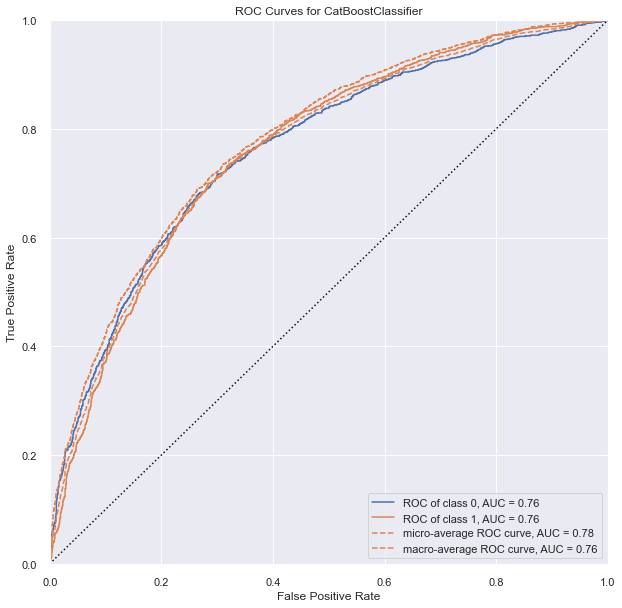

In [68]:
plot_model(best)

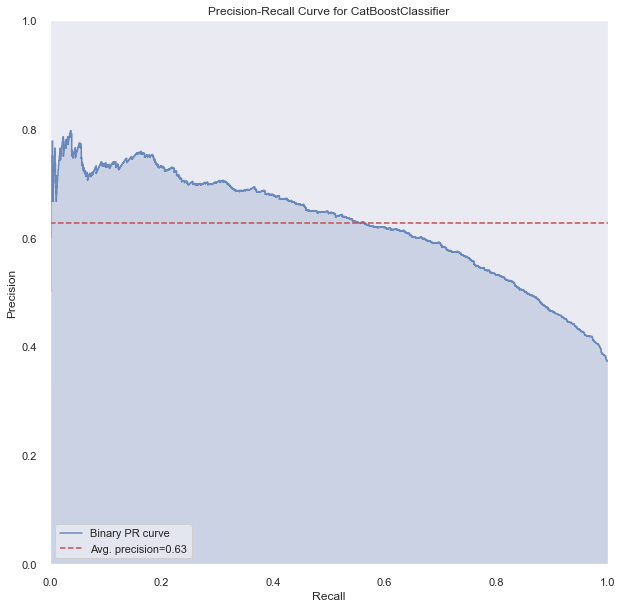

In [69]:
plot_model(best, plot='pr')


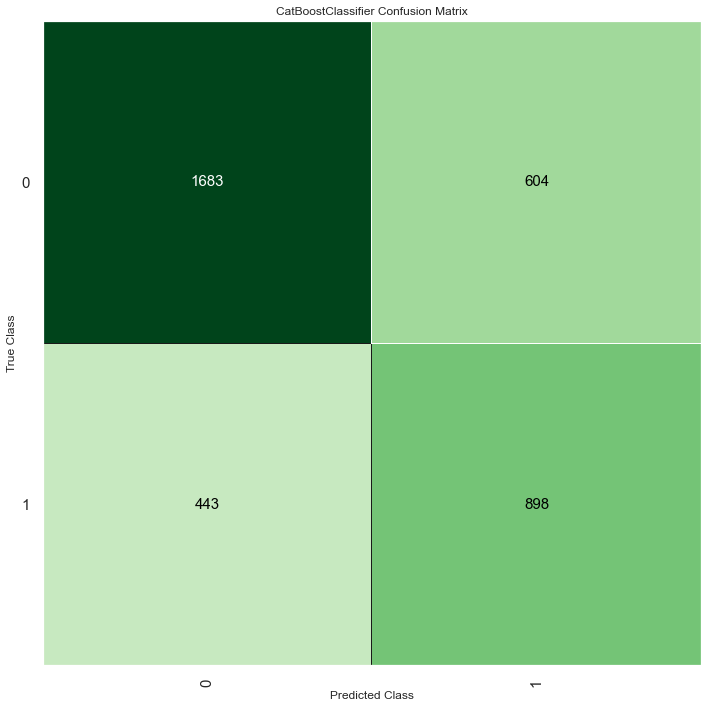

In [70]:
plot_model(best, plot='confusion_matrix')

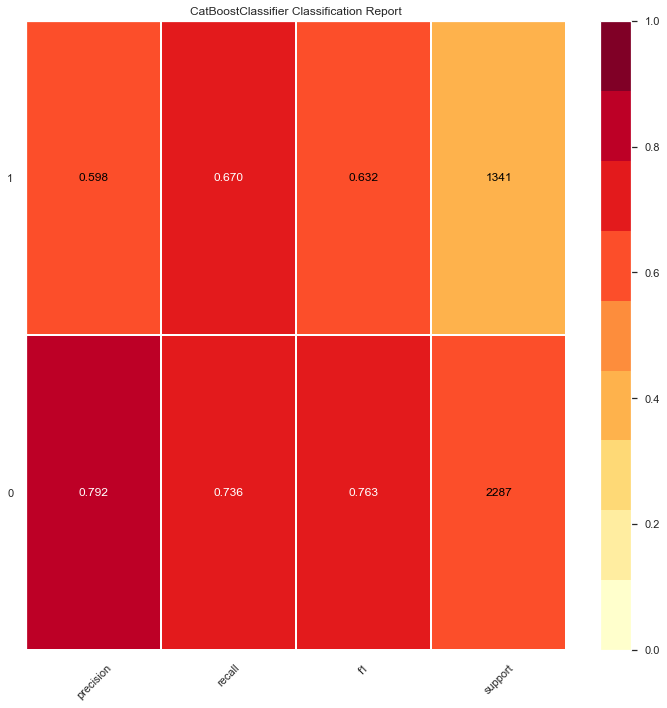

In [71]:
plot_model(best, plot='class_report')


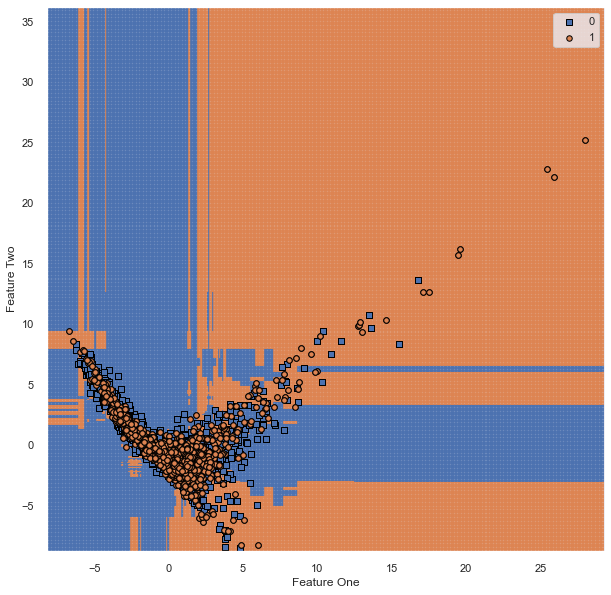

In [72]:
plot_model(best, plot='boundary')


In [73]:
plot_model(best, plot='parameter')


,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


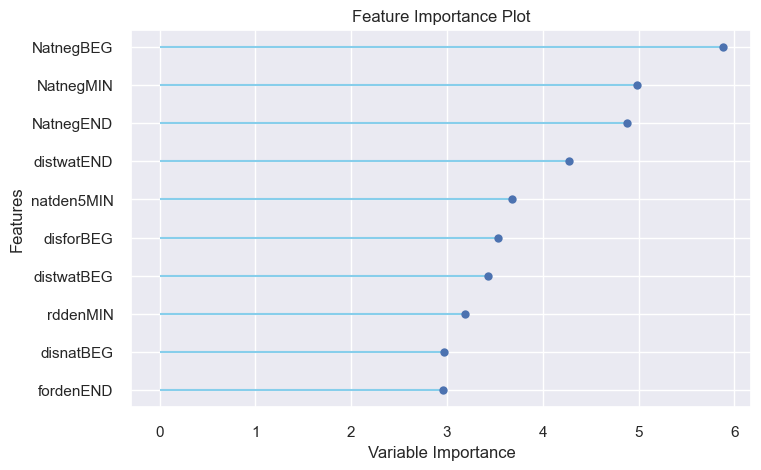

In [74]:
plot_model(best, plot='feature')